# Computer Assignment 4

Negar Moradi 810198543

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\negar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\negar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import codecs
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
import hazm
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Phase 0: Data Analytics

In [3]:
train_dt = pd.read_csv("dataset.csv")
old_data = deepcopy(train_dt)
train_dt


,type,title,cast,country,release_year,listed_in,description
0,Movie,Dick Johnson Is Dead,NaN,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,TV Show,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,TV Show,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,TV Show,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,TV Show,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [4]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11059 entries, 0 to 11058
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          11059 non-null  object
 1   title         11059 non-null  object
 2   cast          9694 non-null   object
 3   country       8364 non-null   object
 4   release_year  11059 non-null  int64 
 5   listed_in     11059 non-null  object
 6   description   11059 non-null  object
dtypes: int64(1), object(6)
memory usage: 345.7+ KB


In [5]:
train_dt.describe()

,release_year
count,11059.000000
mean,2014.209603
std,8.959517
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


type             0.000000
title            0.000000
cast            12.342888
country         24.369292
release_year     0.000000
listed_in        0.000000
description      0.000000
dtype: float64


<AxesSubplot:title={'center':'Missing values'}, ylabel='percent'>

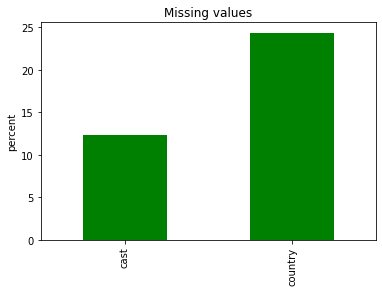

In [6]:
missing_values = (train_dt.isnull().sum()/len(train_dt))*100
print(missing_values)
missing_values = missing_values[missing_values != 0]
missing_values.plot.bar(color = 'green',title = "Missing values", ylabel = "percent")

## Phase 1: Preprocessing

###  1-Ways to handle missing values 

#### 1. Delete Rows with Missing Values:

Missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more columns values as null can also be dropped. <br>
###### Pros:
    A model trained with the removal of all missing values creates a robust model.

###### Cons:
    Loss of a lot of information. 
    Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.



#### 2. Impute missing values with Mean/Median:

Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values. <br>

###### Pros:
    Prevent data loss which results in deletion of rows or columns. 
    Works well with a small dataset and is easy to implement. 

###### Cons:
    Works only with numerical continuous variables. 
    Can cause data leakage. 
    Do not factor the covariance between features.
    
#### 3.Imputation method for categorical columns( Impute missing values with he most frequent category):

When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category. <br>

###### Pros:

    Prevent data loss which results in deletion of rows or columns.
    Works well with a small dataset and is easy to implement.
    Negates the loss of data by adding a unique category.

###### Cons:

    Works only with categorical variables.
    Addition of new features to the model while encoding, which may result in poor performance.

We use method 3. Because this method prevent data loss which results in deletion of rows or columns and Works well with a small dataset and is easy to implement. Also we don't need to drop one whole row.

In [7]:
nan_col = ["cast", "country"]
print(train_dt[nan_col].mode())
train_dt[nan_col]=train_dt[nan_col].fillna(train_dt.mode().iloc[0])

missing_values = (train_dt.isnull().sum()/len(train_dt))*100
print(missing_values)

                 cast        country
0  David Attenborough  United States
type            0.0
title           0.0
cast            0.0
country         0.0
release_year    0.0
listed_in       0.0
description     0.0
dtype: float64


### 2-Normalization & Standardization

Normalization typically means rescales the values into a range of [0,1]. Standardization typically means rescales data to have a mean of 0 and a standard deviation of 1 (unit variance). <br> 
By normalizing a dataset, the values in numeric columns will be converted to a common scale, without distorting differences in ranges of values or losing information.  <br>

${Normalization}$ is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.<br>
${Standardization}$, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization. <br>

We do not use any of the methods, because the value of our numerical variable is years and we can say that year is also a categorical value.


### 3-Categorical features handling

Categorical features are incompatible with many machine learning algorithms. To use them, we have to encode them as numeric values. We can either drop categorical variables or encode them.  

###### 1.One-Hot Encoding

One-Hot Encoding is the most common, correct way to deal with non-ordinal categorical data. It consists of creating an additional feature for each group of the categorical feature and mark each observation belonging (Value=1) or not (Value=0) to that group. <br>
    
###### 2.Target Encoding

A lesser known, but very effective way of handling categorical variables, is Target Encoding. It consists of substituting each group in a categorical feature with the average response in the target variable.

###### 3.Number encoding

We map each category to a number. 

###### 4.Label Encoders

Assigining numbers to each categorical value. <br>

###### Label encoders aren't a good option when our categories don't follow any particular order. One Hot Encoding can be used in these cases, but it uses a lot of memory since a new column is added to each new category. We use label encoding.

In [8]:
from sklearn.preprocessing import *

numerical_cols = list(train_dt._get_numeric_data().columns)
categorical_cols = list(train_dt.columns)
categorical_cols.remove("release_year")
categorical_cols.remove("description")
categorical_cols.remove("title")
categorical_cols


categorical_data =  train_dt[categorical_cols].apply(LabelEncoder().fit_transform)
categorical_data

train_dt['type'] = categorical_data['type']
train_dt

,type,title,cast,country,release_year,listed_in,description
0,0,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm..."
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


### 4- List values in the dataset

The data in this column can be converted to a list, then into columns, and updated based on values.

In [9]:
new_train = deepcopy(train_dt)

genre = set()
genres = [str.split(', ') for str in new_train['listed_in'].tolist()]

genres
def genre_is_in_list(list_genre, genre):
    for str in list_genre.split(','):
        if genre == str.replace(' ', '_'):
            return 1
    return 0

for gnr in genres:
    [genre.add(genr.replace(' ', '_')) for genr in gnr]

genres_dt = pd.DataFrame(index=new_train.index)
for genre in list(genre):
    genres_dt[genre] = new_train['listed_in'].apply(lambda list_genre: genre_is_in_list(list_genre, genre))
    
    
train_dt = pd.concat([train_dt, genres_dt], axis = 1).drop_duplicates()
train_dt

,type,title,cast,country,release_year,listed_in,description,Mystery,Variety,Military_and_War,...,Dramas,Science_&_Nature_TV,Stand-Up_Comedy,Movies,Faith_&_Spirituality,Historical,Sports,Korean_TV_Shows,Young_Adult_Audience,LGBTQ_Movies
0,0,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Count vectorizer

first we remove stop_words.



In [10]:
stop_words_s = codecs.open('stop_words_english.txt', encoding='utf-8')
stop_words = (stopwords.words('english'))
ignore_s = [',','.','!','?','_','-','–','&']

words_count = Counter()
def most_common_words(column, spi):
    for sentence in train_dt[column]:
        words = sentence.split(spi)
        for w in words:
            if w.lower() in stop_words or w.lower() in ignore_s or w.lower() in stop_words_s:
                continue
            else:
                words_count[w] = words_count.get(w, 0) + 1
        
most_common_words("description",' ')
print("for description")
print(words_count.most_common(20))
words_count.clear()
print("for title")
most_common_words("title",' ')
print(words_count.most_common(20))
words_count.clear()
print("for cast")
most_common_words("cast", ', ')
print(words_count.most_common(20))

for description
[('new', 836), ('young', 793), ('life', 776), ('series', 564), ('family', 563), ('one', 517), ('man', 496), ('two', 489), ('friends', 479), ('world', 470), ('must', 463), ('woman', 449), ('find', 449), ('love', 449), ('takes', 368), ('finds', 349), ('help', 344), ('documentary', 339), ('group', 311), ('lives', 295)]
for title
[('Love', 176), ('2', 130), ('Life', 97), ('World', 93), ('Man', 87), ('Story', 85), ('Christmas', 85), ('Little', 84), ('Time', 73), ('One', 73), ('Last', 73), ('American', 70), ('Day', 69), ('Series', 65), ('Movie', 59), ('Black', 58), ('House', 57), ('New', 56), ('Disney', 56), ('City', 53)]
for cast
[('David Attenborough', 1386), ('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 33), ('Takahiro Sakurai', 33), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Yuki Kaji', 30), ('Om Puri', 30), ('Fred Tatasciore', 29), ('Amitabh Bachchan', 28), ('Tara Strong', 28), ('Vincent Tong', 28), ('Paresh Rawal', 28), ('Bo

In [11]:
vectorizer = CountVectorizer(min_df = 100, stop_words='english')
vectorized = vectorizer.fit_transform(train_dt['description'])
vectorizer.get_feature_names_out()
vectorized.toarray()
count_v_df_d = pd.DataFrame(vectorized.toarray(), index=[i for i in range(len(train_dt['description']))], columns=vectorizer.get_feature_names_out())
print(count_v_df_d)
train_dt = pd.concat([train_dt, count_v_df_d], axis = 1)

vectorizer = CountVectorizer(min_df = 100, stop_words='english')
vectorized = vectorizer.fit_transform(train_dt['title'])
vectorizer.get_feature_names_out()
vectorized.toarray()
count_v_df_t = pd.DataFrame(vectorized.toarray(), index=[i for i in range(len(train_dt['title']))], columns=vectorizer.get_feature_names_out())
print(count_v_df_t)
train_dt = pd.concat([train_dt, count_v_df_t], axis = 1)

vectorizer = CountVectorizer(min_df = 100, stop_words='english')
vectorized = vectorizer.fit_transform(train_dt['cast'])
vectorizer.get_feature_names_out()
vectorized.toarray()
count_v_df_c = pd.DataFrame(vectorized.toarray(), index=[i for i in range(len(train_dt['cast']))], columns=vectorizer.get_feature_names_out())
print(count_v_df_c)
train_dt = pd.concat([train_dt, count_v_df_c], axis = 1)

       action  adventure  adventures  agent  america  american  band  based  \
0           0          0           0      0        0         0     0      0   
1           0          0           0      0        0         0     0      0   
2           0          0           0      0        0         0     0      0   
3           0          0           0      0        0         0     0      0   
4           0          0           0      0        0         0     0      0   
...       ...        ...         ...    ...      ...       ...   ...    ...   
11054       0          0           0      0        0         0     0      0   
11055       0          0           0      0        0         0     0      0   
11056       0          0           0      0        0         0     0      0   
11057       0          0           0      0        0         0     0      0   
11058       0          0           0      0        0         0     1      0   

       battle  begins  ...  win  winning  woman  wo

In [12]:
train_dt

,type,title,cast,country,release_year,listed_in,description,Mystery,Variety,Military_and_War,...,tim,tom,tony,van,vincent,wang,william,williams,wilson,young
0,0,Dick Johnson Is Dead,David Attenborough,United States,2020,Documentaries,"As her father nears the end of his life, filmm...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,Jailbirds New Orleans,David Attenborough,United States,2021,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11054,1,X-Men: Evolution,"Noel Fisher, Vincent Gale, Christopher Judge, ...",United States,2000,"Action-Adventure, Animation, Kids",X-Men: Evolution features the team as teenager...,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11055,1,Smart Guy,"Tahj Mowry, John Jones, Jason Weaver, Essence ...",United States,1996,"Comedy, Coming of Age, Kids",A genius tries to fit in as a high school soph...,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11056,1,Disney Kirby Buckets,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,2014,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11057,1,Disney Mech-X4,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,2016,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Using the function count vector, we get the most repeated words, and then we get the number of repetitions of each of these words in each line. <br>
CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).<br>
It is possible to achieve more accurate results by extracting more features.We must keep in mind that these features do not reduce the accuracy of data, and we should remove outdated information.

### Information gain

Information Gain, or IG for short, measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.<br>

A larger information gain suggests a lower entropy group or groups of samples, and hence less surprise. <bR>
You might recall that information quantifies how surprising an event is in bits. Lower probability events have more information, higher probability events have less information. Entropy quantifies how much information there is in a random variable, or more specifically its probability distribution. A skewed distribution has a low entropy, whereas a distribution where events have equal probability has a larger entropy.<br>

In information theory, we like to describe the “surprise” of an event. Low probability events are more surprising therefore have a larger amount of information. Whereas probability distributions where the events are equally likely are more surprising and have larger entropy.<br>
    
    Skewed Probability Distribution (unsurprising): Low entropy.
    Balanced Probability Distribution (surprising): High entropy.

We Used mutual_info_classif() (a provided function in scikit_learn) to measure information gains. The result is shown on a plot below.<br>
To ensure that our information gains are reliable, we eliminate the 'year_of_release' and 'country' columns, since these are unique fields and cannot help us classify items. We also drop 'title', 'description', 'listed_in', 'cast'.

In [13]:
data = train_dt.drop(columns=[ 'listed_in', 'type', 'country','description', 'title', 'cast', 'release_year'], axis = 1)
target_data = train_dt['type']
informationGains = mutual_info_classif(data, target_data)
labels = list(data)


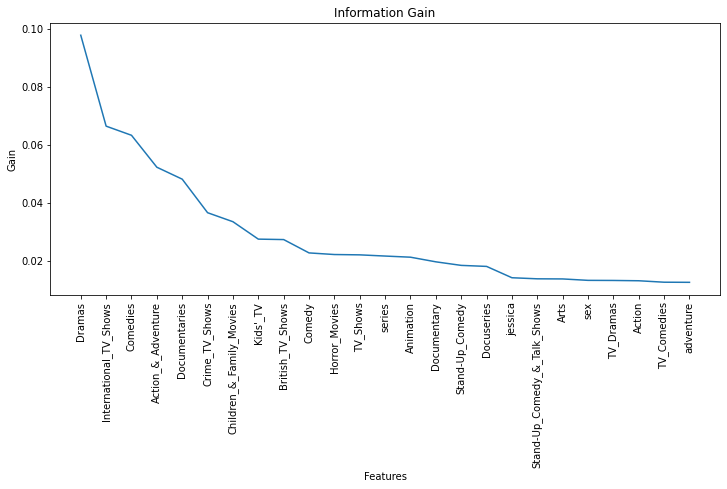

In [14]:

def show_information_gain() :
    plt.figure(figsize=(12, 5))
    infgain = pd.Series(informationGains)
    infgain.index = labels
    infgain.sort_values(ascending=False, inplace = True)
    infgainc = infgain[:25]
    plt.xticks(range(len(infgainc.index)), infgainc.index, rotation=90)
    plt.plot(infgainc.values) 
    plt.xlabel('Features') 
    plt.ylabel('Gain') 
    plt.title('Information Gain') 
    plt.show()
    return infgain
    
informationg = show_information_gain()


## Phase 2

First we split data with train_test_split() into four chunks: 1- training data. 2- target value for training data. 3- test data. 4- target value for test data. Size of test is 25% of total data. The best test is chosen after we run a series of tests with different parameters.

In [15]:
def values(test_size):
    global X_test
    global X_train
    global Y_test
    global Y_train
    X_train, X_test, Y_train, Y_test = train_test_split(data, target_data, test_size = test_size, random_state = 0)

values(0.25)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


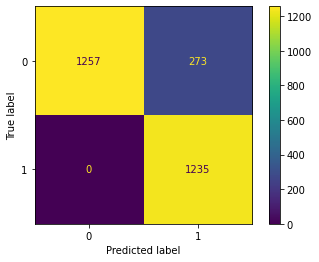

accuracy is:  90.13


In [16]:

def detree(max_depth, min_samples_split):
#     clf = DecisionTreeClassifier(random_state=0, max_depth=max_depth, min_samples_split=min_samples_split)
#     clf.fit(X_train, Y_train)
#     TestPredic = clf.predict(X_test)
#     TrainPredic = clf.predict(X_train)

#     plot_confusion_matrix(clf, X_test, Y_test)  
#     plt.show()
#     return TrainPredic

    clf = DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split)
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    plot_confusion_matrix(clf, X_test, Y_test)  
    plt.show()
    accuracy = "{:.2f}".format(accuracy_score(Y_test, predicted) * 100)
    print("accuracy is: ",accuracy)
max_depth = 5
min_samples_split = 3
detree(max_depth, min_samples_split)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


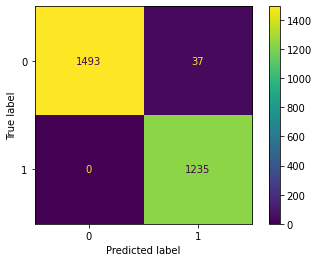

accuracy is:  98.66


In [17]:
detree(10, 2)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


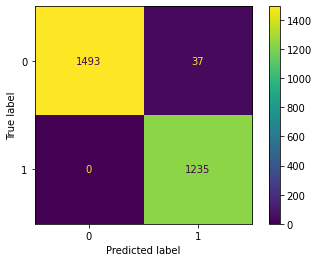

accuracy is:  98.66


In [18]:
detree(10, 5)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


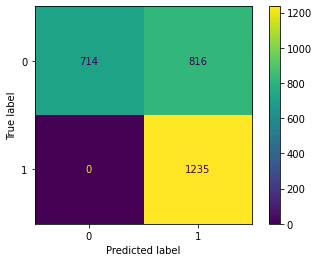

accuracy is:  70.49


In [19]:
detree(2, 5)

As you can see increasing max_deep increases the value of TP and TN and decreases the value of FP .

In [20]:
param_grid = {
    'random_state': [0,20],
    'max_depth': range(5,20),
    'min_samples_split':np.arange(1, 5)
}

clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
grid_result = grid_search.fit(X_train, Y_train)


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\tree\_cl

Best max_depth and min_samples_spot for our decision tree is 16 and 2.

In [21]:
print(grid_result.best_params_)

{'max_depth': 16, 'min_samples_split': 2, 'random_state': 0}


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


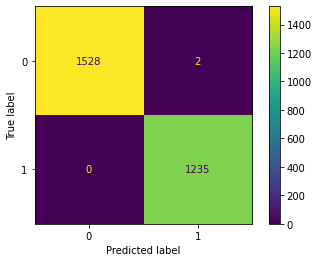

accuracy is:  99.93


In [22]:
detree(16, 2)

max_depthint, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
min_samples_splitint or float, default=2

    The minimum number of samples required to split an internal node:

        If int, then consider min_samples_split as the minimum number.
        If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
 

 ###### 1. We splitted the data as 75% train and 25% train

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


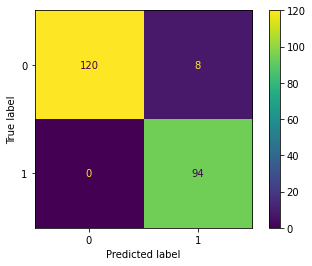

accuracy is:  96.40


In [23]:
values(0.02)
detree(10, 2)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


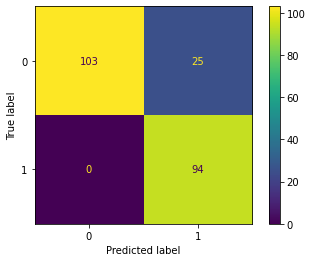

accuracy is:  88.74


In [24]:
detree(5, 2)

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


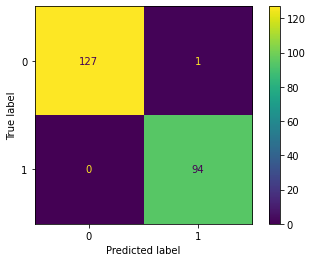

accuracy is:  99.55


In [25]:
detree(20, 5)

In [26]:
values(0.25)

decision_tree = DecisionTreeClassifier(max_depth = 16, min_samples_split = 2)
decision_tree.fit(X_train, Y_train)
predicted = (decision_tree.predict(X_test))
accuracy = "{:.2f}".format(accuracy_score(Y_test, predicted) * 100)
print("accuracy is: ",accuracy)

accuracy is:  99.93


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


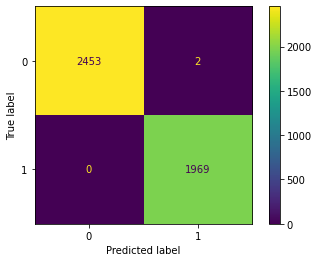

accuracy is:  99.95


In [27]:
values(0.4)
detree(16, 2)

We chose the best parameter after testing a variety of them and set 75 percent of the data as train and the rest as test.<br>
We use sklearn.metrics.plot_confusion_matrix to plot confusion matrix.<br>
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.<br>
Our model is less accurate with small size data. <br>

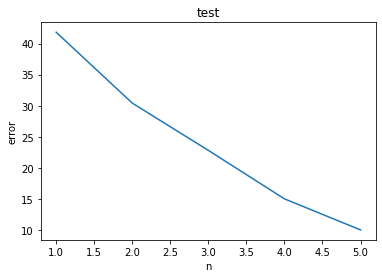

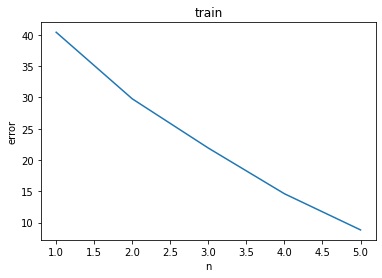

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


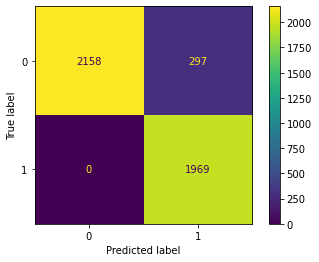

accuracy is:  93.29


In [28]:
def dtree(max_depth, min_samples_split):
    n = [i for i in range(1, max_depth)]
    accur = [0]*(max_depth-1)
    error= [0]*(max_depth-1)
    errort = [0]*(max_depth-1)

    for i in range(len(n)):
        decision_tree = DecisionTreeClassifier(max_depth = n[i], min_samples_split = min_samples_split)
        decision_tree.fit(X_train, Y_train)
        predicted = decision_tree.predict(X_test)
        trainp = decision_tree.predict(X_train)
        accur[i] = "{:.2f}".format(accuracy_score(Y_test, predicted) * 100)
        error[i] = 100 - float(accur[i])
        errort[i] = 100 - float("{:.2f}".format(accuracy_score(Y_train, trainp) * 100))
        
    plt.plot(n,error)
    plt.xlabel("n")
    plt.ylabel("error")
    plt.title("test")
    plt.show()
    
    plt.plot(n,errort)
    plt.xlabel("n")
    plt.ylabel("error")
    plt.title("train")
    plt.show()
    
dtree(6, 2)
detree(6, 2)

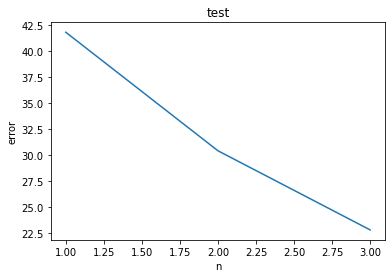

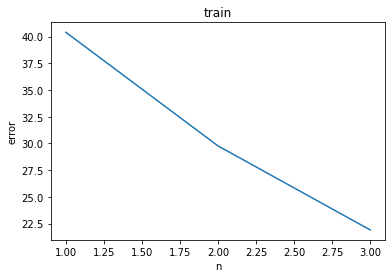

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


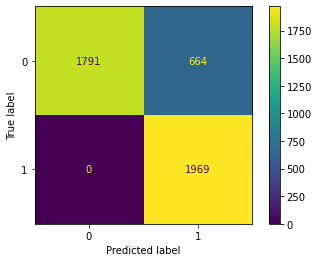

accuracy is:  84.99


In [29]:
dtree(4, 2)
detree(4, 2)

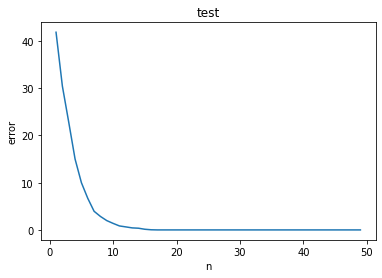

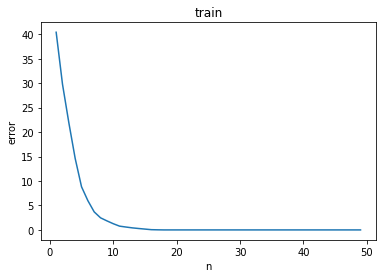

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


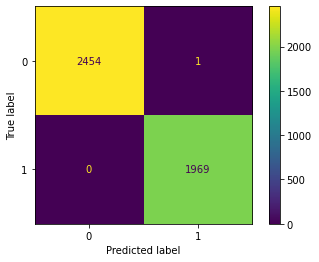

accuracy is:  99.98


In [30]:
dtree(50, 2)
detree(50, 2)

Overfitting may occur with a model that has a large maximum depth. <br>
When a model performs well on the training data but not on the evaluation data, it is overfitting. This is a result of the model memorizing the data it has already seen and not being able to generalize to unseen examples.  <br>
Underfitting occurs when a model is not able to perform well on the training data. The model cannot account for the relationship between the features and the target values.  

## Phase 3

#### Random forest

n_estimatorsint, default=100

    The number of trees in the forest.
    Changed in version 0.22: The default value of n_estimators changed from 10 to 100 in 0.22.
    
criterion{“gini”, “entropy”}, default=”gini”

    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.
    
max_depthint, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    
min_samples_splitint or float, default=2

    The minimum number of samples required to split an internal node:

        If int, then consider min_samples_split as the minimum number.

        If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

Max depth: Best max depth for this random forest is for d = 4 and for big numbers, it causes overfitting.


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


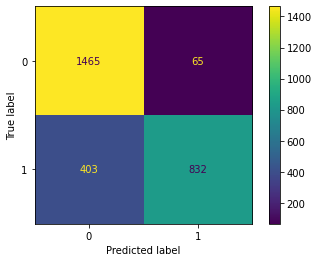

accuracy is: 83.07


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


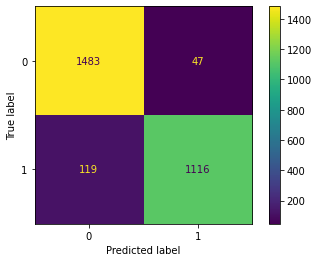

accuracy is: 94.00


c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


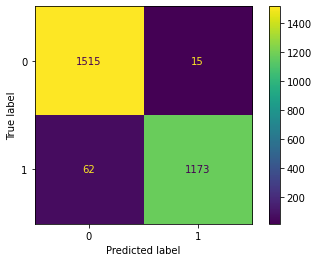

accuracy is: 97.22


In [31]:
values(0.25)
def Randomforest(n_estimators, max_depth):
    clf = RandomForestClassifier(max_depth = max_depth, random_state=0, n_estimators=n_estimators)
    clf.fit(X_train, Y_train)
    predicted = clf.predict(X_test)
    plot_confusion_matrix(clf, X_test, Y_test)  
    plt.show()
    accuracy = "{:.2f}".format(accuracy_score(Y_test, predicted) * 100)
    print("accuracy is:", accuracy)
    
Randomforest(5, 10)
Randomforest(5, 20)
Randomforest(20, 10)

In [36]:
param_grid = {
    'max_depth': [10, 15, 20, 25],
    'n_estimators':[50, 100, 200, 300]
}

clf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid)
grid_result = grid_search.fit(X_train, Y_train)
print(grid_result.best_params_)

{'max_depth': 25, 'n_estimators': 200}


Best max_depth and n_estimators for our Random forest is 25 and 200.

c:\users\negar\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


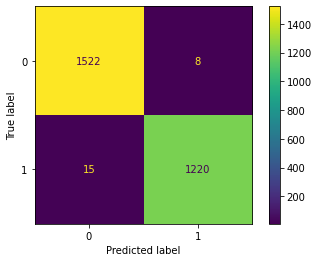

accuracy is: 99.17


In [37]:
Randomforest(200, 25)

In [38]:
max_depth = [2, 10, 15, 20, 25]
n_estimators = [5, 50, 100, 200, 300]
accur = []
depth = []
ns = []

for d in max_depth:
    for n in n_estimators:
        clf = RandomForestClassifier(max_depth = d, random_state=0, n_estimators=n)
        clf.fit(X_train, Y_train)
        predicted = clf.predict(X_test)
        accuracy = "{:.2f}".format(accuracy_score(Y_test, predicted) * 100)
        accur.append(accuracy)
        ns.append(n)
        depth.append(d)

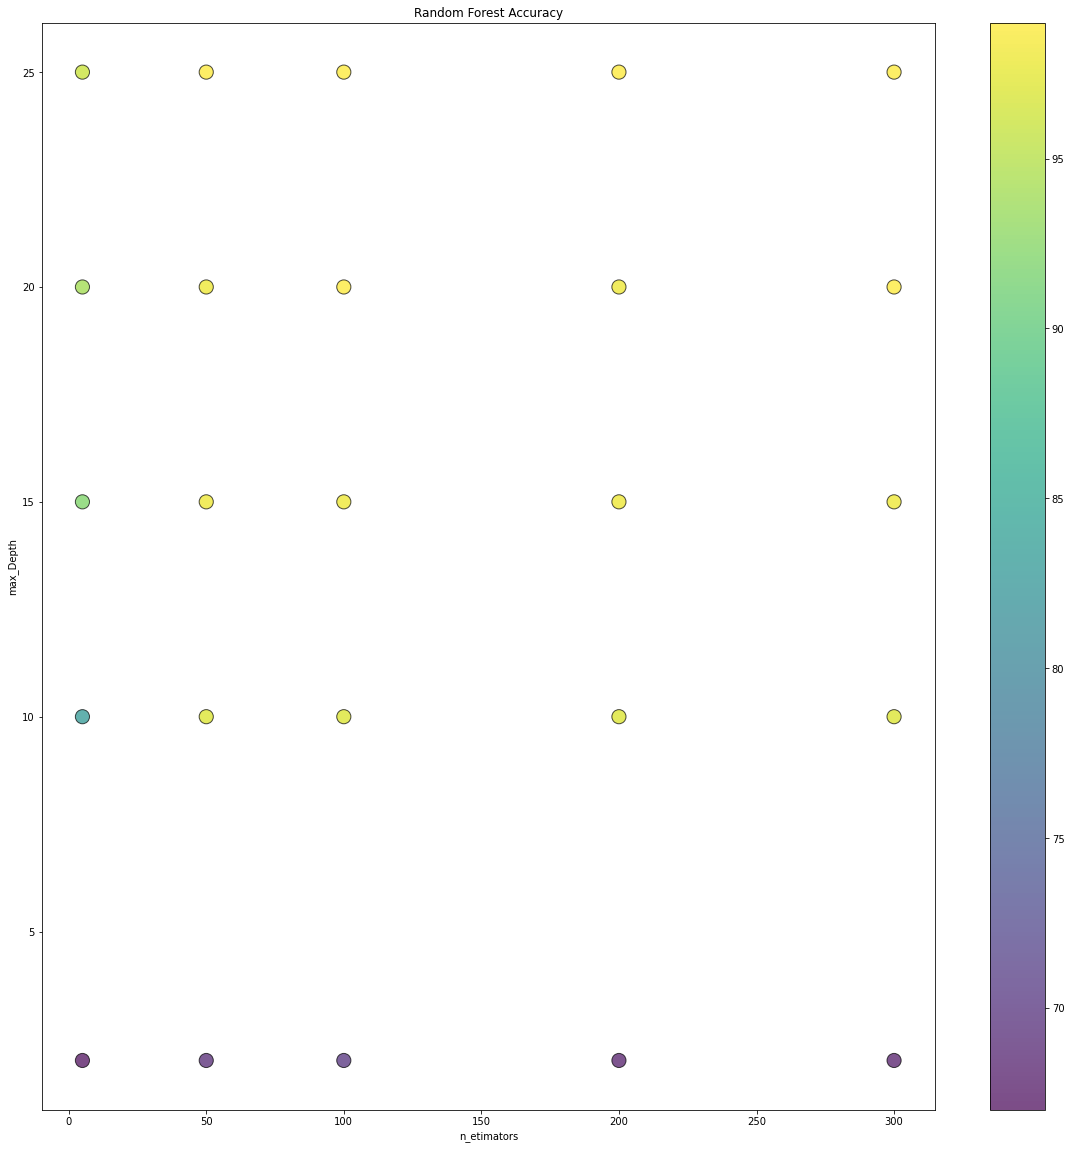

In [39]:
from mpl_toolkits.mplot3d import Axes3D
accur = [round(float(a)) for a in accur]

fig = plt.figure(figsize=(20, 20))
plt.title("Random Forest Accuracy")
plt.ylabel("max_Depth")
plt.xlabel("n_etimators")
coll = plt.scatter(ns, depth,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=accur)
plt.colorbar(coll)
plt.show()

${Bias}$ is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data. <br>
${Variance}$ is the variability of model prediction for a given data point or a value which tells us spread of our data. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.<br>
Random Forest model creates some decision tree models with a max depth from random records and predicts the value, then chooses the average of these values as the answer. This model results in less bias because it uses multiple trees trained on different parts of data.<br>
A decision tree has a very low bias since it overfits to the training data to the maximum possible extent. As a result, random forest usually achieves low bias. On the other hand, random forests employ several techniques to reduce variance in predictions while maintaining the characteristics of the lone Decision Tree. To do this, it combines a number of weakly correlated (if not completely uncorrelated) trees.  <br>

###### Therefore, random forest is a better model.